In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Metodos Para Calcular o Theils U Coefficient
def division(measure, previousI):
  return measure / previousI

def power(measure):
  return np.power(measure, 2)

def summation(measure):
  return np.sum(measure)

def mean(N, measure):
  return (1/N) * measure

def sqrt(measure):
  return np.sqrt(measure)

def theil_u2(y_true, y_pred):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    N = len(y_true)

    subtractionNumerator = y_pred[1:] - y_true[1:]
    divisionNumerator = division(subtractionNumerator, y_true[:-1])
    powerNumerator = power(divisionNumerator)
    summationNumerator = summation(powerNumerator)
    meanNumerator = mean(N, summationNumerator)
    numerator = sqrt(meanNumerator)

    subtractionDenominator = y_true[1:] - y_true[:-1]
    powerDenominator = power(division(subtractionDenominator, y_true[:-1]))
    denominator = sqrt(mean(N, summation(powerDenominator)))

    theilU2 = numerator / denominator

    return theilU2

Adiciona caminho do dataset

In [ ]:
dataset = pd.read_excel('/content/drive/My Drive/IC/VISITAxATENDIMENTOv6.xls')

In [ ]:
dataset

,Período,Municipio,Atendimento Individual
0,2018-10-01,FLORIANÓPOLIS,36895
1,2018-11-01,FLORIANÓPOLIS,30753
2,2018-12-01,FLORIANÓPOLIS,25652
3,2019-01-01,FLORIANÓPOLIS,31905
4,2019-02-01,FLORIANÓPOLIS,26637
5,2019-03-01,FLORIANÓPOLIS,53775
6,2019-04-01,FLORIANÓPOLIS,75869
7,2019-05-01,FLORIANÓPOLIS,79384
8,2019-06-01,FLORIANÓPOLIS,63603
9,2019-07-01,FLORIANÓPOLIS,78274


In [ ]:
time_series = dataset[['Período', 'Atendimento Individual']]
time_series['Período'] = pd.to_datetime(time_series['Período'], format='%d/%m/%Y')
time_series['Atendimento Individual'] = pd.to_numeric(time_series['Atendimento Individual'])
#time_series['Período'] = time_series['Período'].dt.strftime('%m-%Y')

#time_series = time_series.set_index('Período')


<ipython-input-6-2ebd8d70aae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Período'] = pd.to_datetime(time_series['Período'], format='%d/%m/%Y')
<ipython-input-6-2ebd8d70aae8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['Atendimento Individual'] = pd.to_numeric(time_series['Atendimento Individual'])


In [ ]:
X_base = time_series['Atendimento Individual']

In [ ]:
time_series = time_series.set_index('Período').resample('M').mean()

In [ ]:
X = time_series['Atendimento Individual']

In [ ]:
X

Período
2018-10-31     36895.0
2018-11-30     30753.0
2018-12-31     25652.0
2019-01-31     31905.0
2019-02-28     26637.0
2019-03-31     53775.0
2019-04-30     75869.0
2019-05-31     79384.0
2019-06-30     63603.0
2019-07-31     78274.0
2019-08-31     78241.0
2019-09-30     75408.0
2019-10-31     82515.0
2019-11-30     73627.0
2019-12-31     61838.0
2020-01-31     25889.0
2020-02-29     39024.0
2020-03-31     28944.0
2020-04-30     28022.0
2020-05-31     32455.0
2020-06-30     38543.0
2020-07-31     24110.0
2020-08-31     30724.0
2020-09-30     35930.0
2020-10-31     48585.0
2020-11-30     55323.0
2020-12-31     50085.0
2021-01-31     84670.0
2021-02-28     89837.0
2021-03-31    102976.0
2021-04-30     84889.0
2021-05-31    103789.0
2021-06-30     94551.0
2021-07-31     91504.0
2021-08-31     91004.0
2021-09-30     87109.0
2021-10-31     82470.0
2021-11-30     80850.0
2021-12-31    112282.0
2022-01-31    122672.0
2022-02-28     69110.0
2022-03-31    104742.0
2022-04-30     81733.0
202

#SARIMA


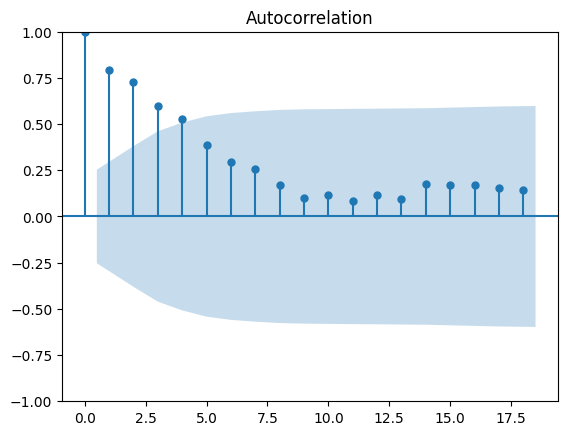

In [ ]:
plot_acf(X)
plt.show()

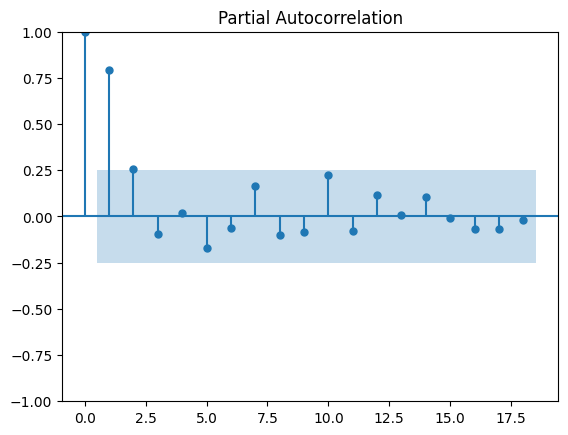

In [ ]:
plot_pacf(X, method='ywm')
plt.show()

In [ ]:
acorr_ljungbox(X, lags=[24])

,lb_stat,lb_pvalue
24,158.554227,8.389569e-22


In [ ]:
sarima_model = auto_arima(X,start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1065.295, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1077.662, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1066.100, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1063.361, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1077.483, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1064.574, Time=0.20 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1064.539, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1065.380, Time=0.08 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1066.538, Time=0.56 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1061.738, Time=0.07 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1065.325, Time=0.33 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1064.863, Time=0.12 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1067.277, Time=0.94 sec
 ARIMA(1,1,0)(0,1,1)[12]

In [ ]:
train = X.loc[:'2022-06-30']
test = X.loc['2022-07-01':]

In [ ]:
len(test)

15

In [ ]:
sarima_model.fit(train)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
sarima_future_forecast = sarima_model.predict(n_periods=30)

In [ ]:
sarima_future_forecast

2022-07-31     82002.530511
2022-08-31     83537.706349
2022-09-30     82837.817207
2022-10-31     89652.512248
2022-11-30     88516.179626
2022-12-31     96618.392590
2023-01-31    103877.305661
2023-02-28     86379.831471
2023-03-31    104625.166114
2023-04-30     93924.036221
2023-05-31    107157.035974
2023-06-30     97512.829649
2023-07-31     95287.360160
2023-08-31     96822.535998
2023-09-30     96122.646856
2023-10-31    102937.341897
2023-11-30    101801.009275
2023-12-31    109903.222239
2024-01-31    117162.135310
2024-02-29     99664.661120
2024-03-31    117909.995763
2024-04-30    107208.865871
2024-05-31    120441.865623
2024-06-30    110797.659298
2024-07-31    108572.189809
2024-08-31    110107.365647
2024-09-30    109407.476505
2024-10-31    116222.171546
2024-11-30    115085.838924
2024-12-31    123188.051888
Freq: M, dtype: float64

In [ ]:
sarima_future_forecast_1 = sarima_future_forecast[:'09-30-2023']
sarima_future_forecast_2 = sarima_future_forecast['10-1-2023':]

In [ ]:
sarima_future_forecast_2

2023-10-31    102937.341897
2023-11-30    101801.009275
2023-12-31    109903.222239
2024-01-31    117162.135310
2024-02-29     99664.661120
2024-03-31    117909.995763
2024-04-30    107208.865871
2024-05-31    120441.865623
2024-06-30    110797.659298
2024-07-31    108572.189809
2024-08-31    110107.365647
2024-09-30    109407.476505
2024-10-31    116222.171546
2024-11-30    115085.838924
2024-12-31    123188.051888
Freq: M, dtype: float64

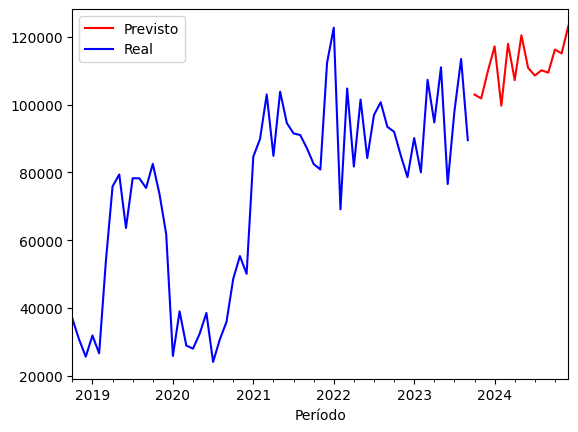

In [ ]:
sarima_future_forecast_2.plot(marker='', color='red', legend=True, label='Previsto')
X.plot(marker='', color='blue', legend=True, label='Real')

plt.show()

In [ ]:

# Parâmetros para calcular os intervalos de confiança
alpha_95 = 0.05  # Nível de significância para intervalo de confiança de 95%
alpha_80 = 0.2
z_critical_95 = stats.norm.ppf(1 - alpha_95 / 2)  # Valor crítico para distribuição normal padrão
z_critical_80 = stats.norm.ppf(1 - alpha_80 / 2)

# Calcular intervalo de confiança
forecast_mean = sarima_future_forecast_2  # Supondo que as previsões já foram calculadas
forecast_std = np.std(X)  # Desvio padrão dos dados históricos

lower_bound_95 = forecast_mean - z_critical_95 * forecast_std
upper_bound_95 = forecast_mean + z_critical_95 * forecast_std

lower_bound_80 = forecast_mean - z_critical_80 * forecast_std
upper_bound_80 = forecast_mean + z_critical_80 * forecast_std

In [ ]:
sarima_future_forecast.index

DatetimeIndex(['2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='M')

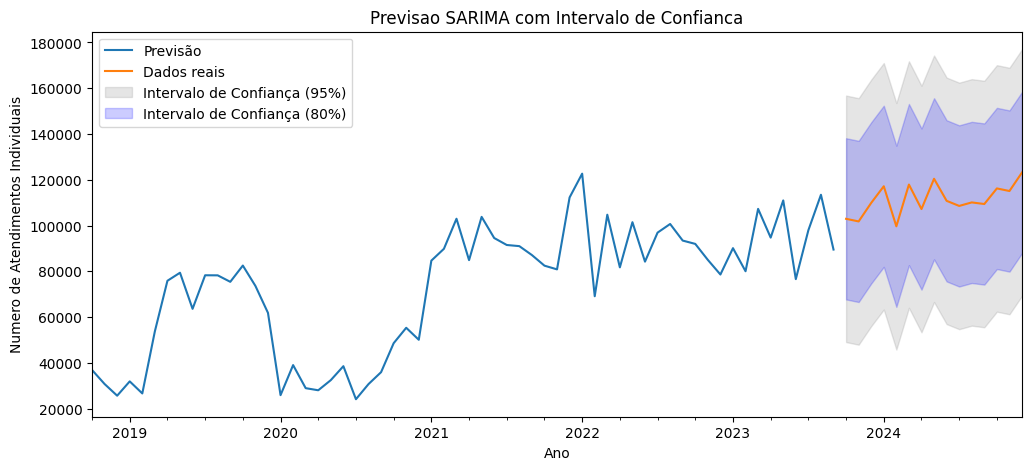

In [ ]:
# Plotting
plt.figure(figsize=(12, 5))
X.plot(marker='', label='Previsão')
sarima_future_forecast_2.plot(marker='', label='Dados reais')


# Plotting confidence intervals
plt.fill_between(sarima_future_forecast_2.index, lower_bound_95, upper_bound_95, color='gray', alpha=0.2, label='Intervalo de Confiança (95%)')
plt.fill_between(sarima_future_forecast_2.index, lower_bound_80, upper_bound_80, color='blue', alpha=0.2, label='Intervalo de Confiança (80%)')
plt.title('Previsao SARIMA com Intervalo de Confianca')
plt.xlabel('Ano')
plt.ylabel('Numero de Atendimentos Individuais')
plt.legend(loc='upper left')

In [ ]:
# Calcular o Erro Absoluto Médio (MAE)
mae = mean_absolute_error(test,sarima_future_forecast_1)
print(f'MAE: {mae}')

# Calcular o Erro Quadrático Médio (MSE)
mse = mean_squared_error(test,sarima_future_forecast_1)
print(f'MSE: {mse}')

# Calcular a Raiz do Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

mape = mean_absolute_percentage_error(test,sarima_future_forecast_1)
print(f'MAPE: {mape}')

TU = theil_u2(test, sarima_future_forecast_1)
print(f'TU: {TU}')

MAE: 9383.165671436955
MSE: 132540646.35191424
RMSE: 11512.629862542886
MAPE: 0.10361521281592578
TU: 0.6576225008477189


In [ ]:
model_fit = sarima_model.fit(train)

In [ ]:
durbin_watson(model_fit.resid())

2.352087681174305

#ARIMA

In [ ]:
arima_model = auto_arima(X,
                         start_p=1, start_q=1,
                         max_p=6, max_q=6,
                         seasonal=False,  # Definindo como False para um modelo ARIMA
                         d=1, D=1,
                         trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1313.715, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1320.809, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1311.691, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1313.149, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1318.979, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1313.640, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1315.710, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1310.367, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1312.363, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1312.443, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1311.712, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1314.436, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.988 seconds


In [ ]:
arima_model.fit(train)

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
future_forecast_arima = arima_model.predict(n_periods=30)

In [ ]:
future_forecast_arima.index

DatetimeIndex(['2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
               '2023-11-30', '2023-12-31', '2024-01-31', '2024-02-29',
               '2024-03-31', '2024-04-30', '2024-05-31', '2024-06-30',
               '2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
               '2024-11-30', '2024-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
future_forecast_arima_1 = future_forecast_arima[:'09-30-2023']
future_forecast_arima_2 = future_forecast_arima['10-1-2023':]

In [ ]:
future_forecast_arima_2

2023-10-31    88504.125633
2023-11-30    88504.125745
2023-12-31    88504.125708
2024-01-31    88504.125720
2024-02-29    88504.125716
2024-03-31    88504.125718
2024-04-30    88504.125717
2024-05-31    88504.125717
2024-06-30    88504.125717
2024-07-31    88504.125717
2024-08-31    88504.125717
2024-09-30    88504.125717
2024-10-31    88504.125717
2024-11-30    88504.125717
2024-12-31    88504.125717
Freq: M, dtype: float64

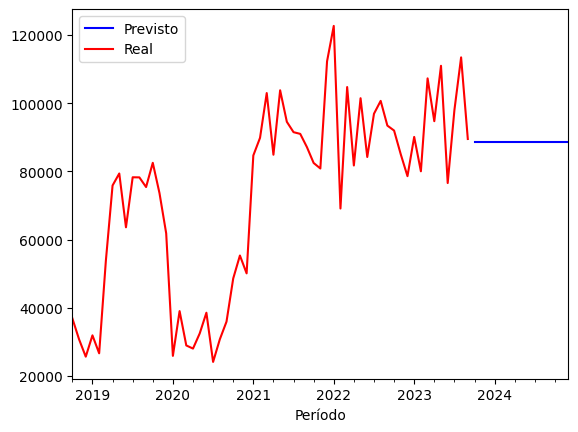

In [ ]:
future_forecast_arima_2.plot(marker='', color='blue', legend=True, label='Previsto')
X.plot(marker='', color='red', label='Real', legend=True)

plt.show()

In [ ]:
# Parâmetros para calcular os intervalos de confiança
alpha_95 = 0.05  # Nível de significância para intervalo de confiança de 95%
alpha_80 = 0.2
z_critical_95 = stats.norm.ppf(1 - alpha_95 / 2)  # Valor crítico para distribuição normal padrão
z_critical_80 = stats.norm.ppf(1 - alpha_80 / 2)

# Calcular intervalo de confiança
forecast_mean = future_forecast_arima_2  # Supondo que as previsões já foram calculadas
forecast_std = np.std(X)  # Desvio padrão dos dados históricos

lower_bound_95 = forecast_mean - z_critical_95 * forecast_std
upper_bound_95 = forecast_mean + z_critical_95 * forecast_std

lower_bound_80 = forecast_mean - z_critical_80 * forecast_std
upper_bound_80 = forecast_mean + z_critical_80 * forecast_std

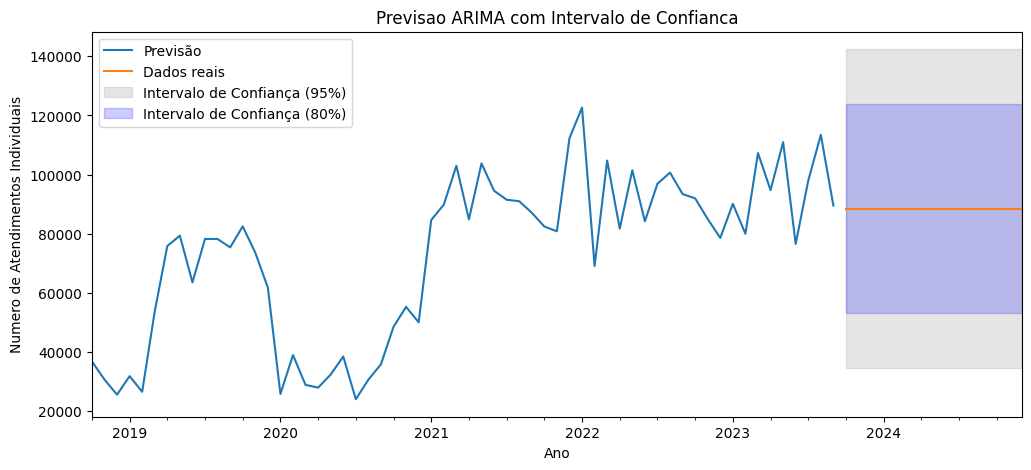

In [ ]:
# Plotting
plt.figure(figsize=(12, 5))
X.plot(marker='', label='Previsão')
future_forecast_arima_2.plot(marker='', label='Dados reais')


# Plotting confidence intervals
plt.fill_between(future_forecast_arima_2.index, lower_bound_95, upper_bound_95, color='gray', alpha=0.2, label='Intervalo de Confiança (95%)')
plt.fill_between(future_forecast_arima_2.index, lower_bound_80, upper_bound_80, color='blue', alpha=0.2, label='Intervalo de Confiança (80%)')
plt.title('Previsao ARIMA com Intervalo de Confianca')
plt.xlabel('Ano')
plt.ylabel('Numero de Atendimentos Individuais')
plt.legend(loc='upper left')

In [ ]:
# Calcular o Erro Absoluto Médio (MAE)
mae = mean_absolute_error(test,future_forecast_arima_1)
print(f'MAE: {mae}')

# Calcular o Erro Quadrático Médio (MSE)
mse = mean_squared_error(test,future_forecast_arima_1)
print(f'MSE: {mse}')

# Calcular a Raiz do Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

mape = mean_absolute_percentage_error(test,future_forecast_arima_1)
print(f'MAPE: {mape}')

TU = theil_u2(test, future_forecast_arima_1)
print(f'TU: {TU}')

MAE: 9750.032860834679
MSE: 145338324.97412166
RMSE: 12055.634573680543
MAPE: 0.10032762612918876
TU: 0.7433241464685024


In [ ]:
model_fit = arima_model.fit(train)

In [ ]:
durbin_watson(model_fit.resid())

1.8650588376473844